In [9]:
import joblib
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [21]:
### read in data dictionary, convert to numpy array
data_dict = joblib.load( open("../final_project/final_project_dataset.pkl", "rb") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

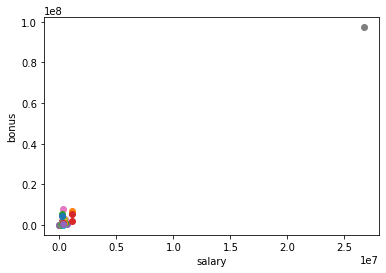

In [22]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [26]:
for key, value in data_dict.items():
    if(value['salary'] != "NaN" and int(value['salary']) > 2000000):
        print(key, ": ", value)

TOTAL :  {'salary': 26704229, 'to_messages': 'NaN', 'deferral_payments': 32083396, 'total_payments': 309886585, 'loan_advances': 83925000, 'bonus': 97343619, 'email_address': 'NaN', 'restricted_stock_deferred': -7576788, 'deferred_income': -27992891, 'total_stock_value': 434509511, 'expenses': 5235198, 'from_poi_to_this_person': 'NaN', 'exercised_stock_options': 311764000, 'from_messages': 'NaN', 'other': 42667589, 'from_this_person_to_poi': 'NaN', 'poi': False, 'long_term_incentive': 48521928, 'shared_receipt_with_poi': 'NaN', 'restricted_stock': 130322299, 'director_fees': 1398517}


We can immediately spot an outlier, now we need to identify the soure of it. As a reference, we will use a public data by FindLaw on Enron employees.
After checking the pdf file, we can see that a person with exceptionally high salary (over 2.5 millions) and bonus (around 1 million) is TOTAL.

## Removing an outlier

In [30]:
# removing an outlier 
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)

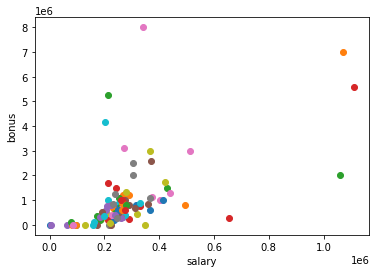

In [31]:
# vis after removing an outlier
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [35]:
for key, value in data_dict.items():
    if(value['salary'] != "NaN" and int(value['salary']) > 1000000 and int(value['bonus']) > 5000000):
        print(key, ": ", value, "\n")

LAY KENNETH L :  {'salary': 1072321, 'to_messages': 4273, 'deferral_payments': 202911, 'total_payments': 103559793, 'loan_advances': 81525000, 'bonus': 7000000, 'email_address': 'kenneth.lay@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': -300000, 'total_stock_value': 49110078, 'expenses': 99832, 'from_poi_to_this_person': 123, 'exercised_stock_options': 34348384, 'from_messages': 36, 'other': 10359729, 'from_this_person_to_poi': 16, 'poi': True, 'long_term_incentive': 3600000, 'shared_receipt_with_poi': 2411, 'restricted_stock': 14761694, 'director_fees': 'NaN'} 

SKILLING JEFFREY K :  {'salary': 1111258, 'to_messages': 3627, 'deferral_payments': 'NaN', 'total_payments': 8682716, 'loan_advances': 'NaN', 'bonus': 5600000, 'email_address': 'jeff.skilling@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 26093672, 'expenses': 29336, 'from_poi_to_this_person': 88, 'exercised_stock_options': 19250000, 'from_messages': 108, 'ot

After removing TOTAL outlier, we could see at least 4 more.
We filtered out on the outliers that had a salary of over 1.000.000 and bonus of over 5.000.000.